In [6]:
import numpy as np
import pandas as pd
from scipy import stats


myPath = "/Users/david/Dropbox/Computing/Linux/Python/python_larder/"
myFile = "nerdle.py"
myCSV_File = "nerdle.csv"


In [ ]:
rng = np.random.default_rng()
seq= rng.normal(size=50)
print(seq)
seq2 = rng.normal(loc=0.5, size=50)
print(seq2)

In [ ]:
rng = np.random.default_rng()
res=stats.anderson_ksamp([rng.normal(size=50),rng.normal(loc=0.5, size=30)])
print(res)
print(res.statistic, res.significance_level)
print(rng.normal(size=50))

In [8]:
data = pd.read_csv(myPath + myCSV_File, sep=",")
print(data)
list_names = data.columns.values.tolist()
if "Bin" in list_names:
    try:
        list_names.remove("Bin")
    except:
        pass

print(list_names)    

   Bin  Dave  Maggie  Toby  Sally  Rob H  Sue  Fabian  Martin  Paul  Rob V  \
0    1     0       0     1      1      0    0       0       2     0      0   
1    2    26       4    35     16     31   14      14      18     4      3   
2    3   140      12   129    116    153   91     131     115    37     37   
3    4   223      17   209    167    218  170     175     169    97     40   
4    5   109      10   143    113    101  114     108      84    84     17   
5    6    27       5    37     45     28   43      33      37    35     10   
6    7    11       0     4     10      6   20      13       0    10      1   

   Hugo  Tom  Ben  
0     1    0    0  
1    16    6    0  
2    88   39    0  
3   155   77    0  
4    76   51    0  
5    21   13    1  
6     6    3    0  
['Dave', 'Maggie', 'Toby', 'Sally', 'Rob H', 'Sue', 'Fabian', 'Martin', 'Paul', 'Rob V', 'Hugo', 'Tom', 'Ben']


In [12]:
def make_raw_data(data, name):
    ### create raw data from frequency distibution ###
    raw_data = np.repeat(data["Bin"], data[name]).to_numpy()

    return raw_data


In [ ]:
raw_dict = dict.fromkeys(list_names, [])
for name in list_names:
    raw_data = make_raw_data(data, name)
    raw_dict[name]=raw_data
print(raw_dict)

In [ ]:
raw_df = pd.concat([pd.DataFrame(v, columns=[k]) for k, v in raw_dict.items()], axis=1)
print(raw_df)

In [ ]:
from fpdf import FPDF

WIDTH = 210
HEIGHT = 297
SIZE = 100

my_path = "/Users/david/Dropbox/Computing/Linux/Python/python_larder/"

day = datetime.today().strftime("%d/%m/%y")

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.set_text_color(68, 118, 171)
pdf.set_draw_color(68, 118, 171)

# ADD LOGO


# ADD TITLE
pdf.cell(
    0,
    15,
    "Nerdlestats Report:   " + day,
    border=0,
    ln=1,
    align="C",
    fill=False,
)

pdf.set_font("Arial", "", 12)
pdf.set_text_color(68, 118, 171)




# OUTPUT PDF
pdf.output(my_path + "nerdlestats_report.pdf", "F")

print("All done")


In [2]:
from reportlab.pdfgen.canvas import Canvas

In [5]:
canvas = Canvas('nerdlestats.pdf')
canvas.drawString(72, 72, "NerdleStats")

canvas.save()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

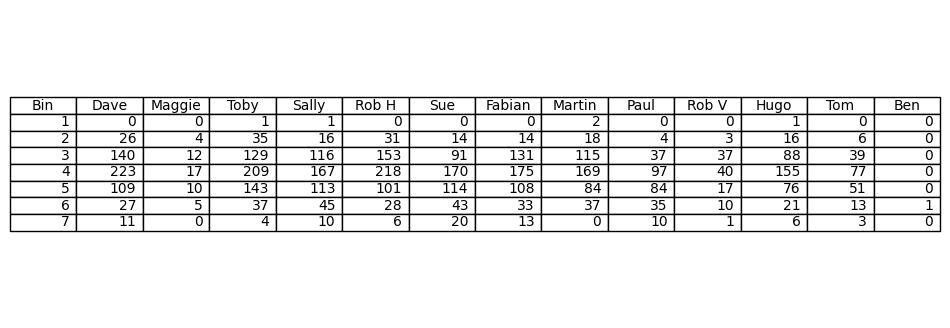

In [10]:
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=data.values,colLabels=data.columns,loc='center')


pp = PdfPages("nerdlestats.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()